In [27]:
import pandas as pd
import re

df1 = pd.read_csv('./rawdata/sincheon_minwon.csv')
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1.head()

,부서,사업명,제안취지,사업내용
0,자연재난과,무더운 대구의 여름을 위한 물놀이사업,대프리카라고 불리는 대구시에 물놀이장을 각 구마다 설치하여 주민들의 편의를 도모하는...,현재 수도권지역이나 다른 광역시에서는 여름이 되면 각 구마다 물놀이를 할 수 있는...
1,공원녹지과,신천동로 중앙분리대 교각 주변 녹지공간 조성,"○ 신천동로에 있는 신성교, 신천철도교, 신천교, 동신교 중앙분리대 교각 주변 나대...","○ 신천동로 신성교, 신천철도교, 신천교, 동신교 교각 주변 녹지<br> 공간 조..."
2,도시디자인과,참 좋은 일자리가 만들어가는 학교 가는 길,효신초등학교 등굣길에 위치한 구 동부정류장 담벼락 보기 흉한 상태로 방치되어<br>...,"󰋻구 동부정류장 담장 도색 <br>󰋻보호 팬스 설치 후 장미넝쿨 식재<br>󰋻도색,..."
3,NaN,침산교-금호대교 사이 오수배출시설 개선 및 보행자 교각 설치,침산교 – 금호대교 사이 오수 배출시설에 대한 환경 개선 및 보행자 통행을 위한 교...,"○ 신천과 금호강변은 많은 대구시민이 산책(걷기, 마라톤, 자전거 등)을 즐기는 곳..."
4,여성가족정책관,제8회평화와인권을위한대구시민걷기대회 “양성평등한 세상 함께 만들어요!”,일본군‘위안부’문제를 올바르게 해결하고 전쟁 없는 평화로운 미래와 여성인권<br>이...,§ 사 업 명: 제8회평화와인권을위한대구시민걷기대회<br>“양성평등한 세상 함께 만...


In [28]:
#중복행 제거
df1 = df1.drop_duplicates(subset=['사업명'] ,keep='first').reset_index(drop=True)   # 사업명을 기준으로 중복 데이터 18개 삭제

#모든 내용을 담은 열 생성
df1['text'] = df1['사업명'] + ' ' + df1['제안취지'] + ' ' + df1['사업내용'] + ' '

#텍스트 정제
df1['text'] = df1['text'].apply(lambda x : re.sub(r'[^가-힣]',' ', x))  #한글 빼고 전부 제거

df1.head()


,부서,사업명,제안취지,사업내용,text
0,자연재난과,무더운 대구의 여름을 위한 물놀이사업,대프리카라고 불리는 대구시에 물놀이장을 각 구마다 설치하여 주민들의 편의를 도모하는...,현재 수도권지역이나 다른 광역시에서는 여름이 되면 각 구마다 물놀이를 할 수 있는...,무더운 대구의 여름을 위한 물놀이사업 대프리카라고 불리는 대구시에 물놀이장을 각 구...
1,공원녹지과,신천동로 중앙분리대 교각 주변 녹지공간 조성,"○ 신천동로에 있는 신성교, 신천철도교, 신천교, 동신교 중앙분리대 교각 주변 나대...","○ 신천동로 신성교, 신천철도교, 신천교, 동신교 교각 주변 녹지<br> 공간 조...",신천동로 중앙분리대 교각 주변 녹지공간 조성 신천동로에 있는 신성교 신천철도교...
2,도시디자인과,참 좋은 일자리가 만들어가는 학교 가는 길,효신초등학교 등굣길에 위치한 구 동부정류장 담벼락 보기 흉한 상태로 방치되어<br>...,"󰋻구 동부정류장 담장 도색 <br>󰋻보호 팬스 설치 후 장미넝쿨 식재<br>󰋻도색,...",참 좋은 일자리가 만들어가는 학교 가는 길 효신초등학교 등굣길에 위치한 구 동부정류...
3,NaN,침산교-금호대교 사이 오수배출시설 개선 및 보행자 교각 설치,침산교 – 금호대교 사이 오수 배출시설에 대한 환경 개선 및 보행자 통행을 위한 교...,"○ 신천과 금호강변은 많은 대구시민이 산책(걷기, 마라톤, 자전거 등)을 즐기는 곳...",침산교 금호대교 사이 오수배출시설 개선 및 보행자 교각 설치 침산교 금호대교 사...
4,여성가족정책관,제8회평화와인권을위한대구시민걷기대회 “양성평등한 세상 함께 만들어요!”,일본군‘위안부’문제를 올바르게 해결하고 전쟁 없는 평화로운 미래와 여성인권<br>이...,§ 사 업 명: 제8회평화와인권을위한대구시민걷기대회<br>“양성평등한 세상 함께 만...,제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만들어요 일본군 위안...


In [42]:
from ckonlpy.tag import Twitter
from pykospacing import Spacing

twt = Twitter()
spacing = Spacing()

#불용어 읽어오기
stopwords = pd.read_csv("stopwords.txt")
stopwords = stopwords['word'].tolist()

#외래어 읽어오기
loanwords = pd.read_csv('loanwords.txt', encoding = 'cp949')
loanwords = loanwords['word'].tolist()
for word in loanwords :
    twt.add_dictionary(word, 'Noun')

#중립어 읽어오기
neutralwords = ['대구', '시민', '주민', '지역', '마을', '공간', '사업', '천원', '억원', '만원', '여명']

c:\Anaconda3\envs\sklearn\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [46]:
# remove stopwords + tokeninzing
content = df1['text'].tolist()

tks=[]
for sentence in content :
    kospacing_sent = spacing(sentence) # 띄워쓰기 보완
    noun_sent = twt.nouns(kospacing_sent) # 명사만 추출
    over_two_sent = [word for word in noun_sent if len(word) > 1]   # 2글자 이상인 단어만 사용
    stopwords_removed_sent = [word for word in over_two_sent if not word in stopwords] # 불용어 제거
    neutral_removed_sent = [word for word in stopwords_removed_sent if not word in neutralwords] # 중립어 제거
    tks.append(neutral_removed_sent)

clean_sents = []
for tk in tks :
    clean_sents.append(" ".join(tk))

#토큰화된 단어로만 이루어진 DF
df2 = pd.DataFrame(columns=['tokens'], data = clean_sents)
df3 = pd.concat([df1, df2], axis=1)

df3.head()

,부서,사업명,제안취지,사업내용,text,tokens
0,자연재난과,무더운 대구의 여름을 위한 물놀이사업,대프리카라고 불리는 대구시에 물놀이장을 각 구마다 설치하여 주민들의 편의를 도모하는...,현재 수도권지역이나 다른 광역시에서는 여름이 되면 각 구마다 물놀이를 할 수 있는...,무더운 대구의 여름을 위한 물놀이사업 대프리카라고 불리는 대구시에 물놀이장을 각 구...,여름 물놀이 대프리카 불리 대구시 물놀이 구마 치하 편의 모하 목적 현재 수도권 이...
1,공원녹지과,신천동로 중앙분리대 교각 주변 녹지공간 조성,"○ 신천동로에 있는 신성교, 신천철도교, 신천교, 동신교 중앙분리대 교각 주변 나대...","○ 신천동로 신성교, 신천철도교, 신천교, 동신교 교각 주변 녹지<br> 공간 조...",신천동로 중앙분리대 교각 주변 녹지공간 조성 신천동로에 있는 신성교 신천철도교...,신천동로 중앙분리대 교각 주변 녹지 조성 신천동로 신성교 신천 도교 신천교 동신교 ...
2,도시디자인과,참 좋은 일자리가 만들어가는 학교 가는 길,효신초등학교 등굣길에 위치한 구 동부정류장 담벼락 보기 흉한 상태로 방치되어<br>...,"󰋻구 동부정류장 담장 도색 <br>󰋻보호 팬스 설치 후 장미넝쿨 식재<br>󰋻도색,...",참 좋은 일자리가 만들어가는 학교 가는 길 효신초등학교 등굣길에 위치한 구 동부정류...,일자리 어가 학교 효신 초등학교 등굣길 위치 정류장 담벼락 보기 상태 방치 도시 미...
3,NaN,침산교-금호대교 사이 오수배출시설 개선 및 보행자 교각 설치,침산교 – 금호대교 사이 오수 배출시설에 대한 환경 개선 및 보행자 통행을 위한 교...,"○ 신천과 금호강변은 많은 대구시민이 산책(걷기, 마라톤, 자전거 등)을 즐기는 곳...",침산교 금호대교 사이 오수배출시설 개선 및 보행자 교각 설치 침산교 금호대교 사...,침산교 금호대교 사이 오수 배출 시설 개선 보행자 교각 설치 침산교 금호대교 사이 ...
4,여성가족정책관,제8회평화와인권을위한대구시민걷기대회 “양성평등한 세상 함께 만들어요!”,일본군‘위안부’문제를 올바르게 해결하고 전쟁 없는 평화로운 미래와 여성인권<br>이...,§ 사 업 명: 제8회평화와인권을위한대구시민걷기대회<br>“양성평등한 세상 함께 만...,제 회평화와인권을위한대구시민걷기대회 양성평등한 세상 함께 만들어요 일본군 위안...,평화 인권 대구시 걷기 대회 양성평등 세상 어요 일본군 위안부 문제 바르게 해결 전...


In [ ]:
clean_sents

### sklearn 라이브러리로 진행

In [47]:
## 텍스트 데이터를 단어 빈도수에 기반해 벡터화시키기
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# max_df = 토큰이 나타날 최대 문서 개수 -> 소수점이면 비중
# max_features = corpus 중 빈도수가 가장 높은 순으로 해당 개수만큼만 뽑아냄
# min_df = 토큰이 나타날 최소 문서 개수 -> 정수면 횟수
# ngram_range = (min_n, max_n) 튜플, 단어장 생성에 사용할 토큰의 크기를 결정

count_vect = CountVectorizer(max_df=0.80, max_features=1000, min_df=2, ngram_range=(1,1))

# feature 리스케일링 해서 feature 평균이 0 분산이 1 되게 만들어줌
#fit_transfrom은 train dataset에서만 사용
ftr_vect = count_vect.fit_transform(df3['tokens'])

# LDA 클래스 사용해 피쳐 벡터화시킨 거 토픽모델링
# n_components = 토픽개수
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(ftr_vect)

# 각 토픽
print(lda.components_.shape)
# 단어들을 벡터화한 feature
print(lda.components_)

(6, 1000)
[[ 3.003465    0.16666706 12.53190421 ...  0.16807654  7.38742697
   0.16734714]
 [ 0.16711492  1.16511213  0.76355306 ...  0.16666693 12.96857905
   6.63838635]
 [ 0.16666712  2.16473994  6.87539128 ...  1.16681182  1.25939385
   0.16698138]
 [ 0.16743863  0.1688356  12.53136399 ...  3.16511032  4.05023218
   2.16631618]
 [ 4.32864706  3.16737389 18.98349787 ...  0.16666707  0.16705092
   1.40771703]
 [ 0.16666727  0.16727136  1.3142896  ...  0.16666732  0.16731703
   3.45325191]]


In [49]:
# lda_model = 벡터화시킨 텍스트 데이터를 fit까지만 적용한 모델
def display_topic_words(lda_model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        print('\nTopic #', topic_idx+1)

        # topic 별로 1000개의 features 중에서 높은 값 순으로 정렬 후 index 반환
        #argsort = 디폴트가 오름차순 -> [::-1]로 내림차순으로 변경
        topic_word_idx = topic.argsort()[::-1]
        top_idx = topic_word_idx[:num_top_words]

        # CountVectorizer 함수 할당시킨 객체에 get_feature_names()로 벡터화시킨 features
        # 벡터화시킨 feature는 숫자-알파벳 순으로 정렬, 단어들 순서는 fit_transform 시키고 난 이후에도 동일
        feature_concat = '+'.join([str(feature_names[i])+'*'+str(round(topic[i], 1)) for i in top_idx])
        print(feature_concat)

feature_names = count_vect.get_feature_names()
display_topic_words(lda, feature_names, 10)     #중요 10개만 모아보기


Topic # 1
설치*206.6+도로*118.2+신천*106.7+안전*98.8+차량*90.6+신천대로*77.4+이용*74.8+사고*72.9+인도*71.3+시장*60.2

Topic # 2
신천*301.3+설치*146.9+조성*107.0+둔치*98.5+이용*81.8+산책로*67.6+경관*52.7+치하*50.4+벽화*50.2+시설*49.8

Topic # 3
도서관*85.1+설치*84.9+신천*68.3+이용*40.0+거리*31.3+청년*28.2+발생*22.6+아파트*21.6+방범*20.2+안전*19.1

Topic # 4
자전거*155.6+신천*112.5+설치*44.1+금호강*41.3+활용*40.3+문화*34.9+관광*32.6+대구시*27.2+제안*26.2+운영*25.4

Topic # 5
신천*147.5+설치*126.5+공원*57.6+조성*51.3+센터*47.3+이용*37.8+운동*32.7+환경*31.2+건강*27.7+복지*25.5

Topic # 6
신천*80.6+벚꽃*36.2+설치*34.1+꽃보라동산*26.1+공원*24.9+화장실*23.2+조명*19.5+나무*18.6+금호강*18.1+조성*16.3


### gensim 라이브러리로 진행

In [50]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary representation of the documents.
dictionary = Dictionary(tks)
print('Number of unique words in initital documents:', len(dictionary))

# 한 문서에서만 나온 단어나 90% 이상의 문서에서 나온 단어는 제외함
dictionary.filter_extremes(no_below=2, no_above=0.9)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 3735
Number of unique words after removing rare and common words: 1849


In [51]:
corpus = [dictionary.doc2bow(tk) for tk in tks]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1849
Number of documents: 482


In [52]:
# 단어사전에 인덱스 추가
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

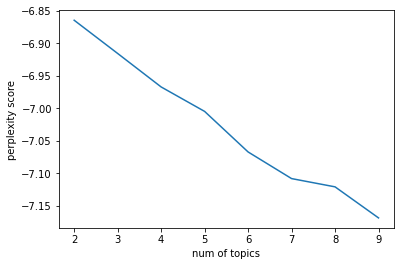

In [53]:
#perplexity : 확률 모델이 결과를 얼마나 정확하게 에측하는지 판단, 낮을수록 좋음
#동일 모델 내 파라미터에 따른 성능평가에 주로 사용, perplexity가 낮다고 해서 결과가 해석 용이한것은 아님

import matplotlib.pyplot as plt
perplexity_values=[]

for i in range(2, 10) :
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=i)
    perplexity_values.append(model.log_perplexity(corpus))

x=range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel("num of topics")
plt.ylabel("perplexity score")
plt.show()

#전부 음수여서 좋은 결과는 아닌 것 같음,,,

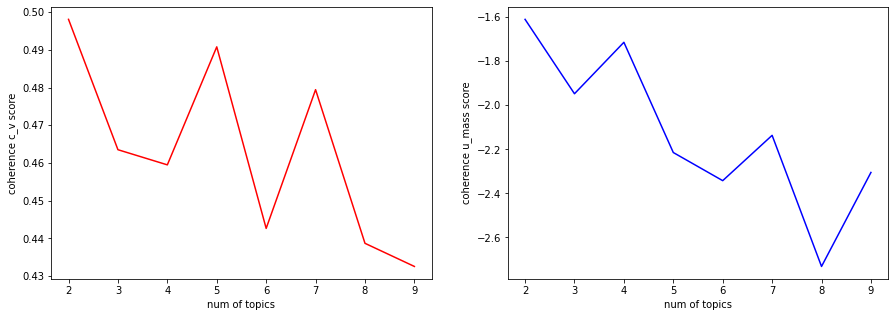

In [69]:
#coherence : 토픽이 얼마나 의미론적으로 일관성 있는지 판단, 높을수록 좋음
#해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인

from gensim.models import CoherenceModel

cv_values=[]
umass_values=[]
for i in range(2, 10) :
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=i)

    #c_v : 통상적으로 0.5~0.6 이상이면 성능이 좋다고 판단
    coherence_model_lda = CoherenceModel(model=model, texts=tks, dictionary=dictionary, topn=10, coherence='c_v')
    cv_values.append(coherence_model_lda.get_coherence())

    #u_mass : 용어 동시발생 혹률, 0에 가까울 수록 좋으며 -10을 넘지않으면 양호
    coherence_model_lda = CoherenceModel(model=model, texts=tks, dictionary=dictionary, topn=10, coherence='u_mass')
    umass_values.append(coherence_model_lda.get_coherence())

#그래프 그리기
x=range(2, 10)
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x, cv_values, 'r')
ax1.set_xlabel("num of topics")
ax1.set_ylabel("coherence c_v score")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x, umass_values, 'b')
ax2.set_xlabel("num of topics")
ax2.set_ylabel("coherence u_mass score")

plt.show()


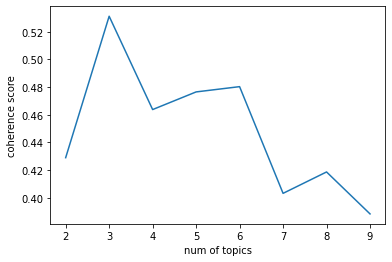

In [70]:
#coherence : 토픽이 얼마나 의미론적으로 일관성 있는지 판단, 높을수록 좋음
#해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인

from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2, 10) :
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=i)
    coherence_model_lda = CoherenceModel(model=model, texts=tks, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x=range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("num of topics")
plt.ylabel("coherence score")
plt.show()

#6이 최적 개수

In [81]:
# Set training parameters.
num_topics = 5
chunksize = 500 # size of the doc looked at every pass
passes = 2 # number of passes through documents
iterations = 40
eval_every = 1  # Don't evaluate model perplexity, takes too much time.


model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, alpha='auto', eta='auto', \
                iterations=iterations, num_topics=num_topics, passes=passes, eval_every=eval_every)

In [84]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

model = LdaModel(corpus=corpus, id2word=id2word, num_topics=4)
ldaVis = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.save_html(ldaVis, 'sincheon.html')
ldaVis

c:\Anaconda3\envs\sklearn\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.043098  0.005878       1        1  35.854699
1      0.045303 -0.009189       2        1  27.817100
0     -0.009541 -0.038238       3        1  21.307749
3      0.007336  0.041550       4        1  15.020452, topic_info=     Term        Freq       Total Category  logprob  loglift
401    시장   58.000000   58.000000  Default  30.0000  30.0000
722    인도   67.000000   67.000000  Default  29.0000  29.0000
792    벚꽃   34.000000   34.000000  Default  28.0000  28.0000
17     신천  755.000000  755.000000  Default  27.0000  27.0000
194   도서관   78.000000   78.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
490    차량   13.158094   85.183380   Topic4  -5.4503   0.0280
129    공원   14.979095  134.720917   Topic4  -5.3206  -0.3008
402  신천대로   13.535619   99.474511   Topic4  -5.4220  -0.0988
201    이용   16.039414  232.579665   Topic4  -5.2522  -0.7784
26     치하   12.568489  117.609198   Topic4  -5.4961  -0.3404

[303 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
583       1  0.360399    가능
583       2  0.440487    가능
583       3  0.120133    가능
583       4  0.080089    가능
724       1  0.115999    가을
...     ...       ...   ...
785       4  0.181847    휀스
1449      2  0.480929  휴먼시아
1449      4  0.480929  휴먼시아
1668      1  0.647109    휴지
1668      2  0.215703    휴지

[676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])